# Producing the training, verification and test data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
import time
import utils

In [11]:
data = pd.read_csv('../list_eval_partition.txt', sep='\s+', header = None, index_col=0)
data.columns = ["Type"]
print(data.head())
print(data.shape)

            Type
0               
000001.jpg     0
000002.jpg     0
000003.jpg     0
000004.jpg     0
000005.jpg     0
(202599, 1)


In [12]:
labels = pd.read_csv('../list_attr_celeba.txt', header =1,  sep='\s+', index_col=0)
#labels.columns = ["Img", "Label"]
pd.set_option('display.max_columns', None)
print(labels.head())
print(labels.shape)

            5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
000001.jpg                -1                1           1               -1   
000002.jpg                -1               -1          -1                1   
000003.jpg                -1               -1          -1               -1   
000004.jpg                -1               -1           1               -1   
000005.jpg                -1                1           1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  Blurry  \
000001.jpg    -1     -1        -1        -1          -1          -1      -1   
000002.jpg    -1     -1        -1         1          -1          -1      -1   
000003.jpg    -1     -1         1        -1          -1          -1       1   
000004.jpg    -1     -1        -1        -1          -1          -1      -1   
000005.jpg    -1     -1         1        -1          -1          -1      -1   

            Brown_Hair  Bushy_Eyebrows  Chubby  Double_C

In [13]:
df = pd.merge(labels, data, left_index=True, right_index=True, how='outer')
df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,Type
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1,0
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,0
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,0
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1,0
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,0


## Select columns with desired features: smile, eyeglasses, hat and mustache

In [14]:
df1=df.drop(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],axis =1)

In [15]:
df1.head()

,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
000001.jpg,-1,-1,1,-1,0
000002.jpg,-1,-1,1,-1,0
000003.jpg,-1,-1,-1,-1,0
000004.jpg,-1,-1,-1,-1,0
000005.jpg,-1,-1,-1,-1,0


In [16]:
df1.reset_index(level=0, inplace=True)
df1.head()

,index,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,000001.jpg,-1,-1,1,-1,0
1,000002.jpg,-1,-1,1,-1,0
2,000003.jpg,-1,-1,-1,-1,0
3,000004.jpg,-1,-1,-1,-1,0
4,000005.jpg,-1,-1,-1,-1,0


In [17]:
df1.rename(columns={'index': 'Image'}, inplace=True)
df1.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,000001.jpg,-1,-1,1,-1,0
1,000002.jpg,-1,-1,1,-1,0
2,000003.jpg,-1,-1,-1,-1,0
3,000004.jpg,-1,-1,-1,-1,0
4,000005.jpg,-1,-1,-1,-1,0


# Create training, verification and test files

In [18]:
train_df1 = df1.loc[df1['Type'] == 0]
print(train_df1.shape)
train_df1.reset_index(level=0, inplace=True)
train = train_df1.drop(['index'], axis=1)
train.head()

(162770, 6)


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,000001.jpg,-1,-1,1,-1,0
1,000002.jpg,-1,-1,1,-1,0
2,000003.jpg,-1,-1,-1,-1,0
3,000004.jpg,-1,-1,-1,-1,0
4,000005.jpg,-1,-1,-1,-1,0


In [19]:
verify_df1 = df1.loc[df1['Type'] == 1]
print(verify_df1.shape)
verify_df1.reset_index(level=0, inplace=True)
verify = verify_df1.drop(['index'], axis=1)
verify.head()

(19867, 6)


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,162771.jpg,-1,-1,1,-1,1
1,162772.jpg,-1,1,1,-1,1
2,162773.jpg,-1,-1,-1,-1,1
3,162774.jpg,-1,-1,1,-1,1
4,162775.jpg,-1,-1,-1,-1,1


In [20]:
test_df1 = df1.loc[df1['Type'] == 2]
print(test_df1.shape)
test_df1.reset_index(level=0, inplace=True)
test = test_df1.drop(['index'], axis=1)
test.head()

(19962, 6)


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,182638.jpg,-1,-1,1,1,2
1,182639.jpg,-1,-1,-1,-1,2
2,182640.jpg,-1,-1,1,-1,2
3,182641.jpg,-1,-1,1,-1,2
4,182642.jpg,-1,-1,1,-1,2


# Save datasets

In [21]:
train.to_csv("train_dataset_labels.csv",index = False)
verify.to_csv("verify_dataset_labels.csv",index = False)
test.to_csv("test_dataset_labels.csv",index = False)

# Explore datasets

In [23]:
# read training data and test data
data = pd.read_csv('train_dataset_labels.csv')
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,000001.jpg,-1,-1,1,-1,0
1,000002.jpg,-1,-1,1,-1,0
2,000003.jpg,-1,-1,-1,-1,0
3,000004.jpg,-1,-1,-1,-1,0
4,000005.jpg,-1,-1,-1,-1,0


In [25]:
Y = data.apply(utils.create_labels, axis = 1)

In [26]:
label_unique_count = Y.value_counts()
label_unique_count

Neutral                                    70682
Smiling_                                   69816
Eyeglasses_                                 4826
Wearing_Hat                                 4000
Eyeglasses_Smiling_                         3625
Mustache_                                   3234
Smiling_Wearing_Hat                         2259
Mustache_Smiling_                           1596
Eyeglasses_Wearing_Hat                       671
Eyeglasses_Mustache_                         623
Mustache_Wearing_Hat                         499
Eyeglasses_Mustache_Smiling_                 329
Eyeglasses_Smiling_Wearing_Hat               249
Mustache_Smiling_Wearing_Hat                 163
Eyeglasses_Mustache_Wearing_Hat              155
Eyeglasses_Mustache_Smiling_Wearing_Hat       43
dtype: int64

In [28]:
# read training data and test data
data = pd.read_csv('verify_dataset_labels.csv')
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,162771.jpg,-1,-1,1,-1,1
1,162772.jpg,-1,1,1,-1,1
2,162773.jpg,-1,-1,-1,-1,1
3,162774.jpg,-1,-1,1,-1,1
4,162775.jpg,-1,-1,-1,-1,1


In [29]:
Y = data.apply(utils.create_labels, axis = 1)

In [30]:
label_unique_count = Y.value_counts()
label_unique_count

Smiling_                                   8553
Neutral                                    8406
Eyeglasses_                                 586
Mustache_                                   520
Eyeglasses_Smiling_                         483
Wearing_Hat                                 460
Smiling_Wearing_Hat                         247
Mustache_Smiling_                           225
Eyeglasses_Mustache_                        129
Eyeglasses_Wearing_Hat                       90
Mustache_Wearing_Hat                         46
Eyeglasses_Smiling_Wearing_Hat               39
Eyeglasses_Mustache_Wearing_Hat              28
Mustache_Smiling_Wearing_Hat                 27
Eyeglasses_Mustache_Smiling_                 25
Eyeglasses_Mustache_Smiling_Wearing_Hat       3
dtype: int64

In [31]:
# read training data and test data
data = pd.read_csv('test_dataset_labels.csv')
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,182638.jpg,-1,-1,1,1,2
1,182639.jpg,-1,-1,-1,-1,2
2,182640.jpg,-1,-1,1,-1,2
3,182641.jpg,-1,-1,1,-1,2
4,182642.jpg,-1,-1,1,-1,2


In [32]:
Y = data.apply(utils.create_labels, axis = 1)

In [33]:
label_unique_count = Y.value_counts()
label_unique_count

Smiling_                                   9012
Neutral                                    8411
Eyeglasses_                                 633
Eyeglasses_Smiling_                         426
Wearing_Hat                                 381
Mustache_                                   336
Smiling_Wearing_Hat                         235
Mustache_Smiling_                           198
Eyeglasses_Mustache_                         68
Eyeglasses_Wearing_Hat                       66
Mustache_Wearing_Hat                         64
Eyeglasses_Mustache_Smiling_                 39
Mustache_Smiling_Wearing_Hat                 36
Eyeglasses_Smiling_Wearing_Hat               26
Eyeglasses_Mustache_Wearing_Hat              16
Eyeglasses_Mustache_Smiling_Wearing_Hat      15
dtype: int64

# Create balanced datasets

Get a limited number of randomly selected Neutral and Smiling photographs to make more balanced dataset.

It also reduce  the total number of images used in training. That is bad for training process accuracity,

but allow to speed up process by using RAM for dataset storing.

In [5]:
# read training data and test data
data = pd.read_csv('train_dataset_labels.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,000001.jpg,-1,-1,1,-1,0
1,000002.jpg,-1,-1,1,-1,0
2,000003.jpg,-1,-1,-1,-1,0
3,000004.jpg,-1,-1,-1,-1,0
4,000005.jpg,-1,-1,-1,-1,0


In [6]:
data_balanced = utils.do_balanced(data, 4000)
print(data_balanced.shape)
Y = data_balanced.apply(utils.create_labels, axis = 1)
label_unique_count = Y.value_counts()
label_unique_count

Neutral: 70682
Smiling: 69816
(30272, 6)


Eyeglasses_                                4826
Wearing_Hat                                4000
Neutral                                    4000
Smiling_                                   4000
Eyeglasses_Smiling_                        3625
Mustache_                                  3234
Smiling_Wearing_Hat                        2259
Mustache_Smiling_                          1596
Eyeglasses_Wearing_Hat                      671
Eyeglasses_Mustache_                        623
Mustache_Wearing_Hat                        499
Eyeglasses_Mustache_Smiling_                329
Eyeglasses_Smiling_Wearing_Hat              249
Mustache_Smiling_Wearing_Hat                163
Eyeglasses_Mustache_Wearing_Hat             155
Eyeglasses_Mustache_Smiling_Wearing_Hat      43
dtype: int64

In [7]:
data_balanced.to_csv("train_balanced.csv",index = False)

In [8]:
# read training data and test data
data = pd.read_csv('verify_dataset_labels.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,162771.jpg,-1,-1,1,-1,1
1,162772.jpg,-1,1,1,-1,1
2,162773.jpg,-1,-1,-1,-1,1
3,162774.jpg,-1,-1,1,-1,1
4,162775.jpg,-1,-1,-1,-1,1


In [10]:
data_balanced = utils.do_balanced(data, 500)
print(data_balanced.shape)
Y = data_balanced.apply(utils.create_labels, axis = 1)
label_unique_count = Y.value_counts()
label_unique_count

Neutral: 8406
Smiling: 8553
(3908, 6)


Eyeglasses_                                586
Mustache_                                  520
Neutral                                    500
Smiling_                                   500
Eyeglasses_Smiling_                        483
Wearing_Hat                                460
Smiling_Wearing_Hat                        247
Mustache_Smiling_                          225
Eyeglasses_Mustache_                       129
Eyeglasses_Wearing_Hat                      90
Mustache_Wearing_Hat                        46
Eyeglasses_Smiling_Wearing_Hat              39
Eyeglasses_Mustache_Wearing_Hat             28
Mustache_Smiling_Wearing_Hat                27
Eyeglasses_Mustache_Smiling_                25
Eyeglasses_Mustache_Smiling_Wearing_Hat      3
dtype: int64

In [11]:
data_balanced.to_csv("verify_balanced.csv",index = False)

In [12]:
# read training data and test data
data = pd.read_csv('test_dataset_labels.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,182638.jpg,-1,-1,1,1,2
1,182639.jpg,-1,-1,-1,-1,2
2,182640.jpg,-1,-1,1,-1,2
3,182641.jpg,-1,-1,1,-1,2
4,182642.jpg,-1,-1,1,-1,2


In [13]:
data_balanced = utils.do_balanced(data, 400)
print(data_balanced.shape)
Y = data_balanced.apply(utils.create_labels, axis = 1)
label_unique_count = Y.value_counts()
label_unique_count

Neutral: 8411
Smiling: 9012
(3339, 6)


Eyeglasses_                                633
Eyeglasses_Smiling_                        426
Neutral                                    400
Smiling_                                   400
Wearing_Hat                                381
Mustache_                                  336
Smiling_Wearing_Hat                        235
Mustache_Smiling_                          198
Eyeglasses_Mustache_                        68
Eyeglasses_Wearing_Hat                      66
Mustache_Wearing_Hat                        64
Eyeglasses_Mustache_Smiling_                39
Mustache_Smiling_Wearing_Hat                36
Eyeglasses_Smiling_Wearing_Hat              26
Eyeglasses_Mustache_Wearing_Hat             16
Eyeglasses_Mustache_Smiling_Wearing_Hat     15
dtype: int64

In [18]:
data_balanced.to_csv("test_balanced.csv",index = False)

# Create small balanced datasets

In [2]:
# read training data and test data
data = pd.read_csv('train_dataset_labels.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,000001.jpg,-1,-1,1,-1,0
1,000002.jpg,-1,-1,1,-1,0
2,000003.jpg,-1,-1,-1,-1,0
3,000004.jpg,-1,-1,-1,-1,0
4,000005.jpg,-1,-1,-1,-1,0


In [3]:
data_minimal = utils.do_minimal(data, 2000)
print(data_minimal.shape)
Y = data_minimal.apply(utils.create_labels, axis = 1)
label_unique_count = Y.value_counts()
label_unique_count

Neutral: 70682
Eyeglasses: 4826
Mustache: 3234
Wearing_Hat: 4000
Smiling: 69816
(10000, 6)


Neutral        2000
Eyeglasses_    2000
Wearing_Hat    2000
Smiling_       2000
Mustache_      2000
dtype: int64

In [5]:
data_minimal.to_csv("train_minimal.csv",index = False)

In [6]:
# read training data and test data
data = pd.read_csv('verify_dataset_labels.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,162771.jpg,-1,-1,1,-1,1
1,162772.jpg,-1,1,1,-1,1
2,162773.jpg,-1,-1,-1,-1,1
3,162774.jpg,-1,-1,1,-1,1
4,162775.jpg,-1,-1,-1,-1,1


In [7]:
data_minimal = utils.do_minimal(data, 400)
print(data_minimal.shape)
Y = data_minimal.apply(utils.create_labels, axis = 1)
label_unique_count = Y.value_counts()
label_unique_count

Neutral: 8406
Eyeglasses: 586
Mustache: 520
Wearing_Hat: 460
Smiling: 8553
(2000, 6)


Neutral        400
Eyeglasses_    400
Smiling_       400
Mustache_      400
Wearing_Hat    400
dtype: int64

In [8]:
data_minimal.to_csv("verify_minimal.csv",index = False)

In [9]:
# read training data and test data
data = pd.read_csv('test_dataset_labels.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,182638.jpg,-1,-1,1,1,2
1,182639.jpg,-1,-1,-1,-1,2
2,182640.jpg,-1,-1,1,-1,2
3,182641.jpg,-1,-1,1,-1,2
4,182642.jpg,-1,-1,1,-1,2


In [10]:
data_minimal = utils.do_minimal(data, 300)
print(data_minimal.shape)
Y = data_minimal.apply(utils.create_labels, axis = 1)
label_unique_count = Y.value_counts()
label_unique_count

Neutral: 8411
Eyeglasses: 633
Mustache: 336
Wearing_Hat: 381
Smiling: 9012
(1500, 6)


Neutral        300
Eyeglasses_    300
Smiling_       300
Mustache_      300
Wearing_Hat    300
dtype: int64

In [11]:
data_minimal.to_csv("test_minimal.csv",index = False)

# Convert to gray scale and resize dataset

In [5]:
data = pd.read_csv('train_balanced.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,000037.jpg,-1,-1,-1,1,0
1,000053.jpg,1,-1,-1,-1,0
2,000068.jpg,-1,-1,1,1,0
3,000073.jpg,-1,-1,-1,-1,0
4,000074.jpg,-1,-1,-1,1,0


In [6]:
train_conv_64 = utils.convert_64_64(data)
train_conv_64.head()

Processed : 0
Processed : 5000
Processed : 10000
Processed : 15000
Processed : 20000
Processed : 25000
Processed : 30000
Data temporary saved to the file  converted_64_64.csv


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,000037.jpg,-1,-1,-1,1,0,77,74,74,74,...,65,59,58,57,58,58,58,58,58,57
1,000053.jpg,1,-1,-1,-1,0,118,114,104,94,...,34,35,36,37,37,36,37,36,35,33
2,000068.jpg,-1,-1,1,1,0,254,255,254,254,...,101,89,99,66,38,37,35,31,28,30
3,000073.jpg,-1,-1,-1,-1,0,2,2,2,2,...,222,222,219,217,216,212,207,206,206,209
4,000074.jpg,-1,-1,-1,1,0,238,238,238,238,...,179,159,162,144,136,132,166,133,132,140


In [4]:
train_conv_64.to_csv('train_conv_64.csv')

In [2]:
data = pd.read_csv('verify_balanced.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,182638.jpg,-1,-1,1,1,2
1,182647.jpg,1,1,-1,-1,2
2,182648.jpg,1,-1,-1,-1,2
3,182649.jpg,-1,1,1,-1,2
4,182662.jpg,1,-1,-1,-1,2


In [3]:
verify_conv_64 = utils.convert_64_64(data)
verify_conv_64.head()

Processed : 0
Data temporary saved to the file  converted_64_64.csv


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,182638.jpg,-1,-1,1,1,2,254,253,253,252,...,0,0,0,0,0,0,0,0,0,0
1,182647.jpg,1,1,-1,-1,2,85,97,111,129,...,191,190,194,195,193,195,200,203,189,187
2,182648.jpg,1,-1,-1,-1,2,25,22,20,18,...,0,0,0,0,0,0,0,0,0,0
3,182649.jpg,-1,1,1,-1,2,158,156,154,154,...,228,229,228,228,227,227,228,228,228,230
4,182662.jpg,1,-1,-1,-1,2,4,4,4,4,...,49,47,46,49,55,55,56,55,50,49


In [4]:
verify_conv_64.to_csv('verify_conv_64.csv')

In [2]:
data = pd.read_csv('test_balanced.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,182638.jpg,-1,-1,1,1,2
1,182647.jpg,1,1,-1,-1,2
2,182648.jpg,1,-1,-1,-1,2
3,182649.jpg,-1,1,1,-1,2
4,182662.jpg,1,-1,-1,-1,2


In [3]:
test_conv_64 = utils.convert_64_64(data)
test_conv_64.head()

Processed : 0
Data temporary saved to the file  converted_64_64.csv


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,182638.jpg,-1,-1,1,1,2,254,253,253,252,...,0,0,0,0,0,0,0,0,0,0
1,182647.jpg,1,1,-1,-1,2,85,97,111,129,...,191,190,194,195,193,195,200,203,189,187
2,182648.jpg,1,-1,-1,-1,2,25,22,20,18,...,0,0,0,0,0,0,0,0,0,0
3,182649.jpg,-1,1,1,-1,2,158,156,154,154,...,228,229,228,228,227,227,228,228,228,230
4,182662.jpg,1,-1,-1,-1,2,4,4,4,4,...,49,47,46,49,55,55,56,55,50,49


In [4]:
test_conv_64.to_csv('test_conv_64.csv')

# Convert minimal dataset

In [12]:
data = pd.read_csv('train_minimal.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,000016.jpg,-1,-1,1,-1,0
1,000025.jpg,-1,-1,-1,-1,0
2,000026.jpg,-1,-1,-1,-1,0
3,000028.jpg,-1,-1,1,-1,0
4,000037.jpg,-1,-1,-1,1,0


In [13]:
train_conv_64 = utils.convert_64_64(data)
train_conv_64.head()

Data size: 10000
Processed : 0
Processed : 5000
Data temporary saved to the file  converted_64_64.csv


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,000016.jpg,-1,-1,1,-1,0,23,23,23,23,...,25,25,24,27,28,29,30,30,36,37
1,000025.jpg,-1,-1,-1,-1,0,87,84,82,82,...,21,71,82,80,76,78,73,72,79,78
2,000026.jpg,-1,-1,-1,-1,0,170,179,176,166,...,192,171,152,113,66,85,104,127,109,65
3,000028.jpg,-1,-1,1,-1,0,232,232,234,230,...,144,171,186,189,185,185,187,191,188,180
4,000037.jpg,-1,-1,-1,1,0,77,74,74,74,...,65,59,58,57,58,58,58,58,58,57


In [14]:
train_conv_64.to_csv('train_minimal_conv_64.csv')

In [15]:
data = pd.read_csv('verify_minimal.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,162783.jpg,-1,-1,-1,-1,1
1,162807.jpg,1,-1,-1,-1,1
2,162813.jpg,-1,-1,1,-1,1
3,162827.jpg,-1,-1,-1,-1,1
4,162844.jpg,-1,-1,-1,1,1


In [16]:
verify_conv_64 = utils.convert_64_64(data)
verify_conv_64.head()

Data size: 2000
Processed : 0
Data temporary saved to the file  converted_64_64.csv


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,162783.jpg,-1,-1,-1,-1,1,206,206,206,206,...,216,217,216,216,215,215,215,214,213,213
1,162807.jpg,1,-1,-1,-1,1,100,87,93,104,...,34,35,37,37,33,31,32,32,36,33
2,162813.jpg,-1,-1,1,-1,1,58,57,54,53,...,43,42,42,42,42,40,41,42,42,42
3,162827.jpg,-1,-1,-1,-1,1,78,78,80,80,...,110,128,156,158,167,197,173,145,152,147
4,162844.jpg,-1,-1,-1,1,1,42,42,42,42,...,205,206,207,206,206,206,206,207,208,208


In [17]:
verify_conv_64.to_csv('verify_minimal_conv_64.csv')

In [18]:
data = pd.read_csv('test_minimal.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,182640.jpg,-1,-1,1,-1,2
1,182702.jpg,-1,-1,-1,-1,2
2,182711.jpg,-1,-1,-1,-1,2
3,182720.jpg,1,-1,-1,-1,2
4,182722.jpg,-1,-1,1,-1,2


In [19]:
test_conv_64 = utils.convert_64_64(data)
test_conv_64.head()

Data size: 1500
Processed : 0
Data temporary saved to the file  converted_64_64.csv


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,182640.jpg,-1,-1,1,-1,2,24,11,3,2,...,34,25,28,31,39,47,38,33,29,25
1,182702.jpg,-1,-1,-1,-1,2,124,125,126,128,...,66,33,17,12,13,14,29,42,44,47
2,182711.jpg,-1,-1,-1,-1,2,40,39,38,39,...,50,49,48,49,49,47,47,47,47,47
3,182720.jpg,1,-1,-1,-1,2,1,1,2,1,...,0,67,127,137,166,163,187,209,202,170
4,182722.jpg,-1,-1,1,-1,2,39,43,42,48,...,81,78,74,74,128,148,77,22,16,16


In [20]:
test_conv_64.to_csv('test_minimal_conv_64.csv')

# Convert to 128X128

In [2]:
data = pd.read_csv('test_minimal.csv',header = 0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type
0,182640.jpg,-1,-1,1,-1,2
1,182702.jpg,-1,-1,-1,-1,2
2,182711.jpg,-1,-1,-1,-1,2
3,182720.jpg,1,-1,-1,-1,2
4,182722.jpg,-1,-1,1,-1,2


In [3]:
test_conv_gray = utils.convert_128_128(data)
test_conv_gray.head()

Data size: 1500
Processed : 0
Data temporary saved to the file  converted_gray.csv


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,182640.jpg,-1,-1,1,-1,2,30,23,14,9,...,45,46,44,37,31,35,34,28,26,25
1,182702.jpg,-1,-1,-1,-1,2,124,124,125,125,...,12,4,5,5,1,17,31,40,41,53
2,182711.jpg,-1,-1,-1,-1,2,40,40,39,39,...,48,47,47,47,47,47,47,47,47,47
3,182720.jpg,1,-1,-1,-1,2,0,0,1,1,...,133,171,175,163,200,212,203,193,137,141
4,182722.jpg,-1,-1,1,-1,2,39,38,43,44,...,154,165,153,95,41,28,16,18,16,16


In [4]:
test_conv_gray.to_csv('test_minimal_128.csv')

In [5]:
data = pd.read_csv('train_minimal.csv',header = 0)
#data.head()
train_conv_gray = utils.convert_128_128(data)
#test_conv_gray.head()
train_conv_gray.to_csv('train_minimal_128.csv')

Data size: 10000
Processed : 0
Processed : 5000
Data temporary saved to the file  converted_gray.csv


In [6]:
data = pd.read_csv('verify_minimal.csv',header = 0)
#data.head()
verify_conv_gray = utils.convert_128_128(data)
#test_conv_gray.head()
verify_conv_gray.to_csv('verify_minimal_128.csv')

Data size: 2000
Processed : 0
Data temporary saved to the file  converted_gray.csv


# Read and check saved data

In [ ]:
#conv = pd.read_csv('converted_64_64.csv',sep=';',header = None)
conv = pd.read_csv('converted_64_64.csv',header = None)
conv.head()

In [2]:
conv = pd.read_csv('test_conv_64.csv',header = 0, index_col=0)
conv.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,182638.jpg,-1,-1,1,1,2,254,253,253,252,...,0,0,0,0,0,0,0,0,0,0
1,182647.jpg,1,1,-1,-1,2,85,97,111,129,...,191,190,194,195,193,195,200,203,189,187
2,182648.jpg,1,-1,-1,-1,2,25,22,20,18,...,0,0,0,0,0,0,0,0,0,0
3,182649.jpg,-1,1,1,-1,2,158,156,154,154,...,228,229,228,228,227,227,228,228,228,230
4,182662.jpg,1,-1,-1,-1,2,4,4,4,4,...,49,47,46,49,55,55,56,55,50,49


In [ ]:
print(conv.shape)

0
(64, 64) uint8


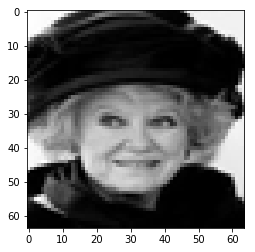

1
(64, 64) uint8


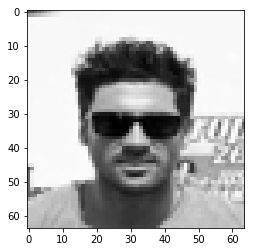

2
(64, 64) uint8


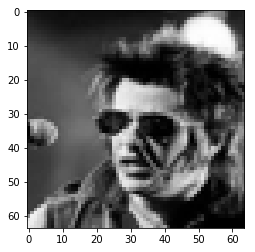

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
for i in range(0,3):
    print(i)
    im = np.asarray(conv.loc[i][6:],dtype=np.uint8)
    image =im.reshape(64,64)
    print(image.shape, image.dtype)
    plt.imshow(image, cmap='gray')
    plt.show() 

In [10]:
conv = pd.read_csv('train_minimal_128.csv',header = 0, index_col=0)
#conv =verify_conv_gray
conv.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,000016.jpg,-1,-1,1,-1,0,23,23,23,23,...,29,30,30,30,31,32,33,34,33,32
1,000025.jpg,-1,-1,-1,-1,0,85,89,88,81,...,79,75,77,71,72,75,77,82,81,75
2,000026.jpg,-1,-1,-1,-1,0,172,169,175,184,...,74,96,96,99,112,129,122,87,61,62
3,000028.jpg,-1,-1,1,-1,0,233,231,231,234,...,178,184,187,186,191,191,193,191,187,187
4,000037.jpg,-1,-1,-1,1,0,77,76,74,73,...,57,57,57,57,57,57,57,57,57,57


0
(128, 128) uint8


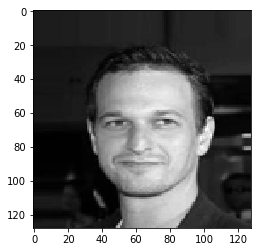

1
(128, 128) uint8


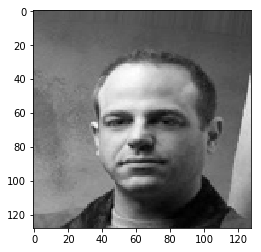

2
(128, 128) uint8


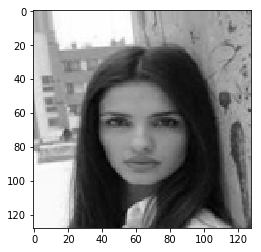

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
for i in range(0,3):
    print(i)
    im = np.asarray(conv.loc[i][6:],dtype=np.uint8)
    image =im.reshape(128,128)
    print(image.shape, image.dtype)
    plt.imshow(image, cmap='gray')
    plt.show() 

# Prepare data for NN

In [2]:
data = pd.read_csv('train_minimal_128.csv',header = 0, index_col=0)
data.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,000016.jpg,-1,-1,1,-1,0,23,23,23,23,...,29,30,30,30,31,32,33,34,33,32
1,000025.jpg,-1,-1,-1,-1,0,85,89,88,81,...,79,75,77,71,72,75,77,82,81,75
2,000026.jpg,-1,-1,-1,-1,0,172,169,175,184,...,74,96,96,99,112,129,122,87,61,62
3,000028.jpg,-1,-1,1,-1,0,233,231,231,234,...,178,184,187,186,191,191,193,191,187,187
4,000037.jpg,-1,-1,-1,1,0,77,76,74,73,...,57,57,57,57,57,57,57,57,57,57


In [18]:
X_train = data.drop(['Image','Eyeglasses','Mustache','Smiling','Wearing_Hat','Type'], axis=1)
X_train = X_train.astype(np.float64)
#X_train = X_train.values/ 255.0
X_train = np.array(X_train)
#X_train.head()

In [19]:
Y_train = data[['Eyeglasses','Mustache','Smiling','Wearing_Hat']]
Y_train.loc[:][:][Y_train <0] = 0
#Y_train.head()
Y_train = np.array(Y_train)

In [46]:
len(X_train)

10000

In [23]:
Y_train[0]

array([0, 0, 1, 0], dtype=int64)

In [27]:
#np.reshape(X_train[0],(16384, 1))
training_inputs = [np.reshape(x, (16384, 1)) for x in X_train]
training_inputs =[np.float32(x) for x in training_inputs]

training_results = [np.reshape(y, (4, 1)) for y in Y_train]
training_data = zip(training_inputs, training_results)

In [48]:
len(training_inputs )

10000

In [21]:
training_data[0]

TypeError: 'zip' object is not subscriptable